R^2: 0.7865 ± 0.0089
MAE: 0.2212 ± 0.0031, Accuracy: 94.76%
MSE: 0.0865 ± 0.0037, Accuracy: 97.95%
RMSE: 0.2940 ± 0.0062, Accuracy: 93.04%


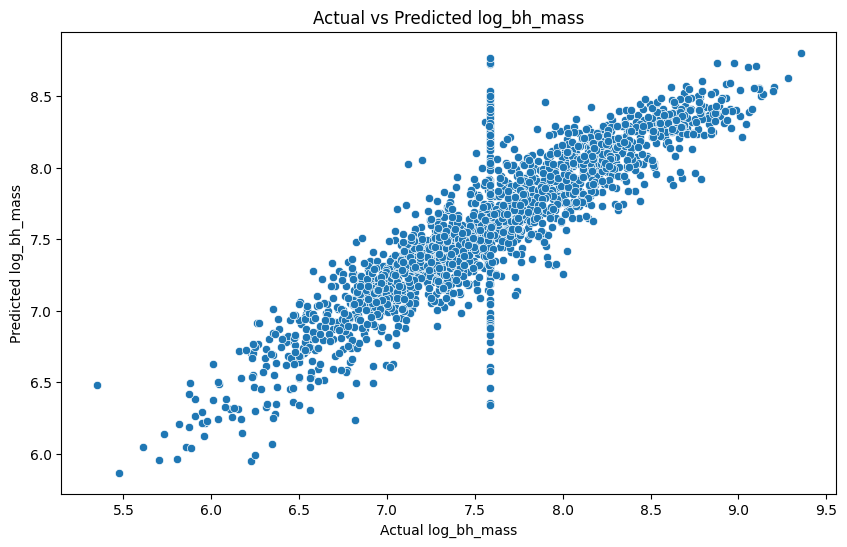

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns

# Step 1: Mount the dataset (Assuming you have uploaded it to Google Colab)
# from google.colab import drive
# drive.mount('/content/drive')

# Load the dataset (assuming a CSV file for simplicity)
df = pd.read_csv('typeII_AGN_metadata.csv')

# Step 2: Define target and features
target = 'log_bh_mass'
features = [
    'h_beta_flux', 'h_beta_flux_err', 'oiii_5007_flux', 'oiii_5007_flux_err',
    'h_alpha_flux', 'h_alpha_flux_err', 'nii_6584_flux', 'nii_6584_flux_err',
    'log_stellar_sigma', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z',
    'psfMagErr_u', 'psfMagErr_g', 'psfMagErr_r', 'psfMagErr_i', 'psfMagErr_z',
    'mendel_logM_p50', 'mendel_logM_p16', 'mendel_logM_p84',
    'mendel_logMt_p50', 'mendel_logMt_p16', 'mendel_logMt_p84',
    'mendel_logMb_p50', 'mendel_logMb_p16', 'mendel_logMb_p84',
    'mendel_logMd_p50', 'mendel_logMd_p16', 'mendel_logMd_p84',
    'simard_b_t_g', 'simard_e_b_t_g', 'simard_b_t_r', 'simard_e_b_t_r',
    'simard_Rhlg', 'simard_Rhlr', 'simard_Rchl_g', 'simard_Rchl_r',
    'simard_Re', 'simard_e_Re', 'simard_e', 'simard_e_e',
    'simard_nb', 'simard_e_nb', 'simard_PpS', 'simard_Pn4'
]

# Step 3: Handling missing values
imputer = SimpleImputer(strategy='mean')
df[features + [target]] = imputer.fit_transform(df[features + [target]])

# Step 4: Normalize the features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Step 5: Train-test split with 80:20 ratio and 5-fold cross-validation
X = df[features]
y = df[target]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
model = GradientBoostingRegressor()

# Lists to store errors
r2_scores, maes, mses, rmses, accuracies_mae, accuracies_mse, accuracies_rmse = [], [], [], [], [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Accuracy by error (1 - error/range) * 100
    y_range = y_test.max() - y_test.min()
    accuracy_mae = (1 - (mae / y_range)) * 100
    accuracy_mse = (1 - (mse / y_range)) * 100
    accuracy_rmse = (1 - (rmse / y_range)) * 100

    # Append to lists
    r2_scores.append(r2)
    maes.append(mae)
    mses.append(mse)
    rmses.append(rmse)
    accuracies_mae.append(accuracy_mae)
    accuracies_mse.append(accuracy_mse)
    accuracies_rmse.append(accuracy_rmse)

# Calculate the mean and standard deviation of the metrics
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)
mean_mae = np.mean(maes)
std_mae = np.std(maes)
mean_mse = np.mean(mses)
std_mse = np.std(mses)
mean_rmse = np.mean(rmses)
std_rmse = np.std(rmses)
mean_accuracy_mae = np.mean(accuracies_mae)
mean_accuracy_mse = np.mean(accuracies_mse)
mean_accuracy_rmse = np.mean(accuracies_rmse)

print(f'R^2: {mean_r2:.4f} ± {std_r2:.4f}')
print(f'MAE: {mean_mae:.4f} ± {std_mae:.4f}, Accuracy: {mean_accuracy_mae:.2f}%')
print(f'MSE: {mean_mse:.4f} ± {std_mse:.4f}, Accuracy: {mean_accuracy_mse:.2f}%')
print(f'RMSE: {mean_rmse:.4f} ± {std_rmse:.4f}, Accuracy: {mean_accuracy_rmse:.2f}%')

# Step 6: Plot the graph between actual and estimated log_bh_mass
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual log_bh_mass')
plt.ylabel('Predicted log_bh_mass')
plt.title('Actual vs Predicted log_bh_mass')
plt.show()
